In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Iniciamos!

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from scipy.stats import pearsonr,spearmanr
from math import sqrt
from sklearn.metrics import mean_squared_error,mean_absolute_error,median_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

## Cargamos los datos

In [ ]:
# Libertad Económica
freedom2016 = pd.read_csv('/content/drive/MyDrive/PIB Analisis/index2016_data.csv', delimiter=';', encoding='latin-1')
freedom2017 = pd.read_csv('/content/drive/MyDrive/PIB Analisis/index2017_data.csv', delimiter=';', encoding='latin-1')
freedom2018 = pd.read_csv('/content/drive/MyDrive/PIB Analisis/index2018_data.csv', delimiter=';', encoding='latin-1')
freedom2019 = pd.read_csv('/content/drive/MyDrive/PIB Analisis/index2019_data.csv', delimiter=';', encoding='latin-1')
freedom2020 = pd.read_csv('/content/drive/MyDrive/PIB Analisis/index2020_data.csv', delimiter=';', encoding='latin-1')
# Area del país
superficie = pd.read_csv('/content/drive/MyDrive/PIB Analisis/Land Area.csv')

In [ ]:
freedom2016.head(1)

,CountryID,Country Name,WEBNAME,Region,World Rank,Region Rank,2016 Score,Change in Yearly Score from 2015,Property Rights,Change in Property Rights from 2015,Freedom from Corruption,Change in Freedom from Corruption from 2015,Fiscal Freedom,Change in Fiscal Freedom from 2015,Gov't Spending,Change in Gov't Spending from 2015,Business Freedom,Change in Business Freedom from 2015,Labor Freedom,Change in Labor Freedom from 2015,Monetary Freedom,Change in Monetary Freedom from 2015,Trade Freedom,Change in Trade Freedom from 2015,Investment Freedom,Change in Investment Freedom from 2015,Financial Freedom,Change in Financial Freedom from 2015,Tariff Rate (%),Income Tax Rate (%),Corporate Tax Rate (%),Tax Burden % of GDP,Gov't Expenditure % of GDP,Country,Population (Millions),"GDP (Billions, PPP)",GDP Growth Rate (%),5 Year GDP Growth Rate (%),GDP per Capita (PPP),Unemployment (%),Inflation (%),FDI Inflow (Millions),Public Debt (% of GDP)
0,1,Afghanistan,Afghanistan,Asia-Pacific,NaN,NaN,NaN,NaN,NaN,NaN,12.0,4.0,91.6,-0.1,81.2,0.0,56.6,-4.8,63.2,-4.3,NaN,NaN,NaN,NaN,55.0,0.0,NaN,NaN,NaN,20.0,20.0,6.6,25.0,Afghanistan,31.3,$60.6,1.5,6.8,"$1,937",9.1,4.6,53.6,6.7


In [ ]:
freedom2018.head(1)

,CountryID,Country Name,WEBNAME,Region,World Rank,Region Rank,2018 Score,Property Rights,Judical Effectiveness,Government Integrity,Tax Burden,Gov't Spending,Fiscal Health,Business Freedom,Labor Freedom,Monetary Freedom,Trade Freedom,Investment Freedom,Financial Freedom,Tariff Rate (%),Income Tax Rate (%),Corporate Tax Rate (%),Tax Burden % of GDP,Gov't Expenditure % of GDP,Country,Population (Millions),"GDP (Billions, PPP)",GDP Growth Rate (%),5 Year GDP Growth Rate (%),GDP per Capita (PPP),Unemployment (%),Inflation (%),FDI Inflow (Millions),Public Debt (% of GDP)
0,1,Afghanistan,Afghanistan,Asia-Pacific,154.0,38.0,51.3,17.9,28.2,26.2,91.8,79.3,98.3,53.0,57.3,77.8,66.0,10.0,10.0,7.0,20.0,20.0,5.0,26.3,Afghanistan,33.4,$64.1,1.5,4.4,"$1,918.6",8.5,4.4,99.6,8.3


In [ ]:
superficie.head(1)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,Unnamed: 65
0,Aruba,ABW,Land area (sq. km),AG.LND.TOTL.K2,NaN,180.0,180.0,180.0,180.0,180.0,180.0,180.0,180.0,180.0,180.0,180.0,180.0,180.0,180.0,180.0,180.0,180.0,180.0,180.0,180.0,180.0,180.0,180.0,180.0,180.0,180.0,180.0,180.0,180.0,180.0,180.0,180.0,180.0,180.0,180.0,180.0,180.0,180.0,180.0,180.0,180.0,180.0,180.0,180.0,180.0,180.0,180.0,180.0,180.0,180.0,180.0,180.0,180.0,180.0,180.0,180.0,180.0,180.0,NaN,NaN,NaN


In [ ]:
print(freedom2016.shape)
print(freedom2017.shape)
print(freedom2018.shape)
print(freedom2019.shape)
print(freedom2020.shape)
print(superficie.shape)

(186, 43)
(200, 36)
(186, 34)
(187, 34)
(187, 34)
(266, 66)


In [ ]:
print(freedom2016.columns)
print(freedom2017.columns)
print(freedom2018.columns)
print(freedom2019.columns)
print(freedom2020.columns)

Index(['CountryID', 'Country Name', 'WEBNAME', 'Region', 'World Rank',
       'Region Rank', '2016 Score', 'Change in Yearly Score from 2015',
       'Property Rights', 'Change in Property Rights from 2015',
       'Freedom from Corruption',
       'Change in Freedom from Corruption from 2015', 'Fiscal Freedom ',
       'Change in Fiscal Freedom from 2015', 'Gov't Spending',
       'Change in Gov't Spending from 2015', 'Business Freedom',
       'Change in Business Freedom from 2015', 'Labor Freedom',
       'Change in Labor Freedom from 2015', 'Monetary Freedom',
       'Change in Monetary Freedom from 2015', 'Trade Freedom',
       'Change in Trade Freedom from 2015', 'Investment Freedom ',
       'Change in Investment Freedom from 2015', 'Financial Freedom',
       'Change in Financial Freedom from 2015', 'Tariff Rate (%)',
       'Income Tax Rate (%)', 'Corporate Tax Rate (%)', 'Tax Burden % of GDP',
       'Gov't Expenditure % of GDP ', 'Country', 'Population (Millions)',
       '

# Limpieza de Datos

## Datos irrelevantes

Podemos observar que existen variables que no aportan información y que no utilizaremos para el análisis.

In [ ]:
superficie.drop(['Unnamed: 65','2020'], axis=1, inplace=True)
freedom2016.drop(['CountryID','WEBNAME','2016 Score',
                  'Change in Financial Freedom from 2015',
                  'Change in Investment Freedom from 2015',
                  'Change in Trade Freedom from 2015',
                  'Change in Monetary Freedom from 2015',
                  'Change in Labor Freedom from 2015',
                  'Change in Business Freedom from 2015',
                  'Change in Gov\'t Spending from 2015',
                  'Change in Fiscal Freedom from 2015',
                  'Change in Freedom from Corruption from 2015',
                  'Change in Property Rights from 2015',
                  'Change in Yearly Score from 2015'],axis=1,inplace=True)
freedom2017.drop(['CountryID','WEBNAME','2017 Score','Unnamed: 34','Unnamed: 35'],axis=1,inplace=True)
freedom2018.drop(['CountryID','WEBNAME','2018 Score'],axis=1,inplace=True)
freedom2019.drop(['ï»¿CountryID','WEBNAME','2019 Score'],axis=1,inplace=True)
freedom2020.drop(['CountryID','WEBNAME','2020 Score'],axis=1,inplace=True)

## Freedom

In [ ]:
freedom2017.shape

(200, 31)

In [ ]:
freedom2017.isnull().sum()

Country Name                   14
Region                         14
World Rank                     20
Region Rank                    20
Property Rights                15
Judical Effectiveness          16
Government Integrity           15
Tax Burden                     18
Gov't Spending                 17
Fiscal Health                  15
Business Freedom               14
Labor Freedom                  14
Monetary Freedom               17
Trade Freedom                  17
Investment Freedom             19
Financial Freedom              19
Tariff Rate (%)                17
Income Tax Rate (%)            16
Corporate Tax Rate (%)         16
Tax Burden % of GDP            21
Gov't Expenditure % of GDP     18
Country                        14
Population (Millions)          14
GDP (Billions, PPP)            14
GDP Growth Rate (%)            14
5 Year GDP Growth Rate (%)     18
GDP per Capita (PPP)           17
Unemployment (%)               24
Inflation (%)                  17
FDI Inflow (Mi

# Trabajaremos con datos del 2016 hasta 2020

In [ ]:
superficie = superficie[['Country Name','Country Code','2018']]
superficie.columns = ['Country Name','Country Code','superficie']

In [ ]:
freedom2017.columns

Index(['Country Name', 'Region', 'World Rank', 'Region Rank',
       'Property Rights', 'Judical Effectiveness', 'Government Integrity',
       'Tax Burden', 'Gov't Spending', 'Fiscal Health', 'Business Freedom',
       'Labor Freedom', 'Monetary Freedom', 'Trade Freedom',
       'Investment Freedom ', 'Financial Freedom', 'Tariff Rate (%)',
       'Income Tax Rate (%)', 'Corporate Tax Rate (%)', 'Tax Burden % of GDP',
       'Gov't Expenditure % of GDP ', 'Country', 'Population (Millions)',
       'GDP (Billions, PPP)', 'GDP Growth Rate (%)',
       '5 Year GDP Growth Rate (%)', 'GDP per Capita (PPP)',
       'Unemployment (%)', 'Inflation (%)', 'FDI Inflow (Millions)',
       'Public Debt (% of GDP)'],
      dtype='object')

In [ ]:
freedom2020.columns

Index(['Country Name', 'Region', 'World Rank', 'Region Rank',
       'Property Rights', 'Judical Effectiveness', 'Government Integrity',
       'Tax Burden', 'Gov't Spending', 'Fiscal Health', 'Business Freedom',
       'Labor Freedom', 'Monetary Freedom', 'Trade Freedom',
       'Investment Freedom ', 'Financial Freedom', 'Tariff Rate (%)',
       'Income Tax Rate (%)', 'Corporate Tax Rate (%)', 'Tax Burden % of GDP',
       'Gov't Expenditure % of GDP ', 'Country', 'Population (Millions)',
       'GDP (Billions, PPP)', 'GDP Growth Rate (%)',
       '5 Year GDP Growth Rate (%)', 'GDP per Capita (PPP)',
       'Unemployment (%)', 'Inflation (%)', 'FDI Inflow (Millions)',
       'Public Debt (% of GDP)'],
      dtype='object')

In [ ]:
print(freedom2017.shape)
print(freedom2018.shape)
print(freedom2019.shape)
print(freedom2020.shape)

(200, 31)
(186, 31)
(187, 31)
(187, 31)


In [ ]:
freedom = freedom2017.append([freedom2018,freedom2019,freedom2020])
freedom.shape

(760, 31)

In [ ]:
print(list(freedom.columns))
print(list(superficie.columns))

['Country Name', 'Region', 'World Rank', 'Region Rank', 'Property Rights', 'Judical Effectiveness', 'Government Integrity', 'Tax Burden', "Gov't Spending", 'Fiscal Health', 'Business Freedom', 'Labor Freedom', 'Monetary Freedom', 'Trade Freedom', 'Investment Freedom ', 'Financial Freedom', 'Tariff Rate (%)', 'Income Tax Rate (%)', 'Corporate Tax Rate (%)', 'Tax Burden % of GDP', "Gov't Expenditure % of GDP ", 'Country', 'Population (Millions)', 'GDP (Billions, PPP)', 'GDP Growth Rate (%)', '5 Year GDP Growth Rate (%)', 'GDP per Capita (PPP)', 'Unemployment (%)', 'Inflation (%)', 'FDI Inflow (Millions)', 'Public Debt (% of GDP)']
['Country Name', 'Country Code', 'superficie']


In [ ]:
freedom = pd.merge(freedom,superficie.drop(['Country Code'],axis=1),on='Country Name',how='left')
print(freedom.shape)
print(list(freedom.columns))
freedom.head()

(760, 32)
['Country Name', 'Region', 'World Rank', 'Region Rank', 'Property Rights', 'Judical Effectiveness', 'Government Integrity', 'Tax Burden', "Gov't Spending", 'Fiscal Health', 'Business Freedom', 'Labor Freedom', 'Monetary Freedom', 'Trade Freedom', 'Investment Freedom ', 'Financial Freedom', 'Tariff Rate (%)', 'Income Tax Rate (%)', 'Corporate Tax Rate (%)', 'Tax Burden % of GDP', "Gov't Expenditure % of GDP ", 'Country', 'Population (Millions)', 'GDP (Billions, PPP)', 'GDP Growth Rate (%)', '5 Year GDP Growth Rate (%)', 'GDP per Capita (PPP)', 'Unemployment (%)', 'Inflation (%)', 'FDI Inflow (Millions)', 'Public Debt (% of GDP)', 'superficie']


,Country Name,Region,World Rank,Region Rank,Property Rights,Judical Effectiveness,Government Integrity,Tax Burden,Gov't Spending,Fiscal Health,Business Freedom,Labor Freedom,Monetary Freedom,Trade Freedom,Investment Freedom,Financial Freedom,Tariff Rate (%),Income Tax Rate (%),Corporate Tax Rate (%),Tax Burden % of GDP,Gov't Expenditure % of GDP,Country,Population (Millions),"GDP (Billions, PPP)",GDP Growth Rate (%),5 Year GDP Growth Rate (%),GDP per Capita (PPP),Unemployment (%),Inflation (%),FDI Inflow (Millions),Public Debt (% of GDP),superficie
0,Afghanistan,Asia-Pacific,163.0,40.0,12.6,28.4,27.5,91.6,79.9,97.3,54.2,59.9,69.3,66.0,0.0,0.0,7.0,20.0,20.0,6.5,27.1,Afghanistan,32.0,$62.3,1.5,5.4,"$1,947",9.6,-1.5,58.0,6.8,652860.0
1,Albania,Europe,65.0,30.0,54.0,28.5,39.7,86.9,72.5,51.5,79.3,50.7,81.4,87.7,70.0,70.0,1.1,23.0,15.0,23.6,30.0,Albania,2.8,$32.7,2.6,1.9,"$11,301",17.3,1.9,"1,003.3",71.9,27400.0
2,Algeria,Middle East / North Africa,172.0,14.0,38.2,29.6,31.7,81.1,51.0,19.8,62.1,49.5,67.0,63.3,35.0,30.0,8.4,35.0,23.0,11.7,44.4,Algeria,39.5,$578.7,3.7,3.3,"$14,504",10.5,4.8,-587.3,8.7,2381741.0
3,Angola,Sub-Saharan Africa,165.0,41.0,36.4,19.8,12.8,87.7,58.6,70.7,58.5,40.4,70.6,56.7,30.0,40.0,11.7,17.0,30.0,6.5,28.9,Angola,25.1,$184.4,3.0,4.7,"$7,344",7.6,10.3,"8,680.9",62.3,1246700.0
4,Argentina,Americas,156.0,26.0,32.4,39.6,38.2,62.6,54.6,56.4,57.3,46.1,50.9,66.7,50.0,50.0,6.6,35.0,35.0,35.9,43.9,Argentina,42.4,$972.0,1.2,2.7,"$22,554",6.7,26.5,"11,654.9",56.5,2736690.0


In [ ]:
superficie[['Country Name','superficie']]

,Country Name,superficie
0,Aruba,1.800000e+02
1,Africa Eastern and Southern,1.480704e+07
2,Afghanistan,6.528600e+05
3,Africa Western and Central,9.045780e+06
4,Angola,1.246700e+06
...,...,...
261,Kosovo,NaN
262,"Yemen, Rep.",5.279700e+05
263,South Africa,1.213090e+06
264,Zambia,7.433900e+05


## Freedom

In [ ]:
freedom.drop(['Country','World Rank','Region Rank'],axis=1,inplace=True)
freedom.dtypes

Country Name                    object
Region                          object
Property Rights                float64
Judical Effectiveness          float64
Government Integrity           float64
Tax Burden                     float64
Gov't Spending                 float64
Fiscal Health                  float64
Business Freedom               float64
Labor Freedom                  float64
Monetary Freedom               float64
Trade Freedom                  float64
Investment Freedom             float64
Financial Freedom              float64
Tariff Rate (%)                float64
Income Tax Rate (%)            float64
Corporate Tax Rate (%)         float64
Tax Burden % of GDP            float64
Gov't Expenditure % of GDP     float64
Population (Millions)           object
GDP (Billions, PPP)             object
GDP Growth Rate (%)             object
5 Year GDP Growth Rate (%)     float64
GDP per Capita (PPP)            object
Unemployment (%)                object
Inflation (%)            

Estas variables debemos corregirlas para que sean numéricas:
- Population (Millions)
- GDP (Billions, PPP)
- GDP Growth Rate (%)
- GDP per Capita (PPP)
- Unemployment (%)
- FDI Inflow (Millions)

In [ ]:
freedom['Population (Millions)'] = freedom['Population (Millions)'].str.replace(',','')
freedom['Population (Millions)'] = freedom['Population (Millions)'].str.replace(' ppl.','')
freedom['Population (Millions)'] = freedom['Population (Millions)'].astype('float')

In [ ]:
freedom['GDP (Billions, PPP)'] = freedom['GDP (Billions, PPP)'].str.replace('$','')
freedom['GDP (Billions, PPP)'] = freedom['GDP (Billions, PPP)'].str.replace(',','')
freedom['GDP (Billions, PPP)'] = freedom['GDP (Billions, PPP)'].str.replace(' \(2014 nominal\)','')
freedom['GDP (Billions, PPP)'] = freedom['GDP (Billions, PPP)'].str.replace(' \(nominal\)','')
freedom['GDP (Billions, PPP)'] = freedom['GDP (Billions, PPP)'].str.replace(' \(2015 nominal\)','')
freedom['GDP (Billions, PPP)'] = freedom['GDP (Billions, PPP)'].str.replace(' \(2015 est.\)','')
freedom['GDP (Billions, PPP)'] = freedom['GDP (Billions, PPP)'].str.replace(' CHF \(2014 \)','')
freedom['GDP (Billions, PPP)'] = freedom['GDP (Billions, PPP)'].astype('float')

In [ ]:
freedom['GDP Growth Rate (%)'] = freedom['GDP Growth Rate (%)'].str.replace(' \(2014\)','')
freedom['GDP Growth Rate (%)'] = freedom['GDP Growth Rate (%)'].astype('float')

In [ ]:
freedom['GDP per Capita (PPP)'] = freedom['GDP per Capita (PPP)'].str.replace('$','')
freedom['GDP per Capita (PPP)'] = freedom['GDP per Capita (PPP)'].str.replace(',','')
freedom['GDP per Capita (PPP)'] = freedom['GDP per Capita (PPP)'].str.replace(' \(2014\)','')
freedom['GDP per Capita (PPP)'] = freedom['GDP per Capita (PPP)'].str.replace(' \(estimated\)','')
freedom['GDP per Capita (PPP)'] = freedom['GDP per Capita (PPP)'].str.replace(' \(2015 est.\)','')
freedom['GDP per Capita (PPP)'] = freedom['GDP per Capita (PPP)'].str.replace(' \(2009 est.\)','')
freedom['GDP per Capita (PPP)'] = freedom['GDP per Capita (PPP)'].astype('float')

In [ ]:
freedom['Unemployment (%)'] = freedom['Unemployment (%)'].str.replace(' \(2004\)','')
freedom['Unemployment (%)'] = freedom['Unemployment (%)'].str.replace(' \(2014\)','')
freedom['Unemployment (%)'] = freedom['Unemployment (%)'].str.replace(' \(2015\)','')
freedom['Unemployment (%)'] = freedom['Unemployment (%)'].str.replace(' \(2016\)','')
freedom['Unemployment (%)'] = freedom['Unemployment (%)'].astype('float')

In [ ]:
freedom['FDI Inflow (Millions)'] = freedom['FDI Inflow (Millions)'].str.replace(',','')
freedom['FDI Inflow (Millions)'] = freedom['FDI Inflow (Millions)'].str.replace(' \(2014 net\)','')
freedom['FDI Inflow (Millions)'] = freedom['FDI Inflow (Millions)'].astype('float')

In [ ]:
print(freedom.shape)
freedom.head()

(760, 29)


,Country Name,Region,Property Rights,Judical Effectiveness,Government Integrity,Tax Burden,Gov't Spending,Fiscal Health,Business Freedom,Labor Freedom,Monetary Freedom,Trade Freedom,Investment Freedom,Financial Freedom,Tariff Rate (%),Income Tax Rate (%),Corporate Tax Rate (%),Tax Burden % of GDP,Gov't Expenditure % of GDP,Population (Millions),"GDP (Billions, PPP)",GDP Growth Rate (%),5 Year GDP Growth Rate (%),GDP per Capita (PPP),Unemployment (%),Inflation (%),FDI Inflow (Millions),Public Debt (% of GDP),superficie
0,Afghanistan,Asia-Pacific,12.6,28.4,27.5,91.6,79.9,97.3,54.2,59.9,69.3,66.0,0.0,0.0,7.0,20.0,20.0,6.5,27.1,32.0,62.3,1.5,5.4,1947.0,9.6,-1.5,58.0,6.8,652860.0
1,Albania,Europe,54.0,28.5,39.7,86.9,72.5,51.5,79.3,50.7,81.4,87.7,70.0,70.0,1.1,23.0,15.0,23.6,30.0,2.8,32.7,2.6,1.9,11301.0,17.3,1.9,1003.3,71.9,27400.0
2,Algeria,Middle East / North Africa,38.2,29.6,31.7,81.1,51.0,19.8,62.1,49.5,67.0,63.3,35.0,30.0,8.4,35.0,23.0,11.7,44.4,39.5,578.7,3.7,3.3,14504.0,10.5,4.8,-587.3,8.7,2381741.0
3,Angola,Sub-Saharan Africa,36.4,19.8,12.8,87.7,58.6,70.7,58.5,40.4,70.6,56.7,30.0,40.0,11.7,17.0,30.0,6.5,28.9,25.1,184.4,3.0,4.7,7344.0,7.6,10.3,8680.9,62.3,1246700.0
4,Argentina,Americas,32.4,39.6,38.2,62.6,54.6,56.4,57.3,46.1,50.9,66.7,50.0,50.0,6.6,35.0,35.0,35.9,43.9,42.4,972.0,1.2,2.7,22554.0,6.7,26.5,11654.9,56.5,2736690.0


In [ ]:
freedom.dtypes

Country Name                    object
Region                          object
Property Rights                float64
Judical Effectiveness          float64
Government Integrity           float64
Tax Burden                     float64
Gov't Spending                 float64
Fiscal Health                  float64
Business Freedom               float64
Labor Freedom                  float64
Monetary Freedom               float64
Trade Freedom                  float64
Investment Freedom             float64
Financial Freedom              float64
Tariff Rate (%)                float64
Income Tax Rate (%)            float64
Corporate Tax Rate (%)         float64
Tax Burden % of GDP            float64
Gov't Expenditure % of GDP     float64
Population (Millions)          float64
GDP (Billions, PPP)            float64
GDP Growth Rate (%)            float64
5 Year GDP Growth Rate (%)     float64
GDP per Capita (PPP)           float64
Unemployment (%)               float64
Inflation (%)            

# Tenemos todo el dataset listo!

## Matriz de correlación

### Pearson

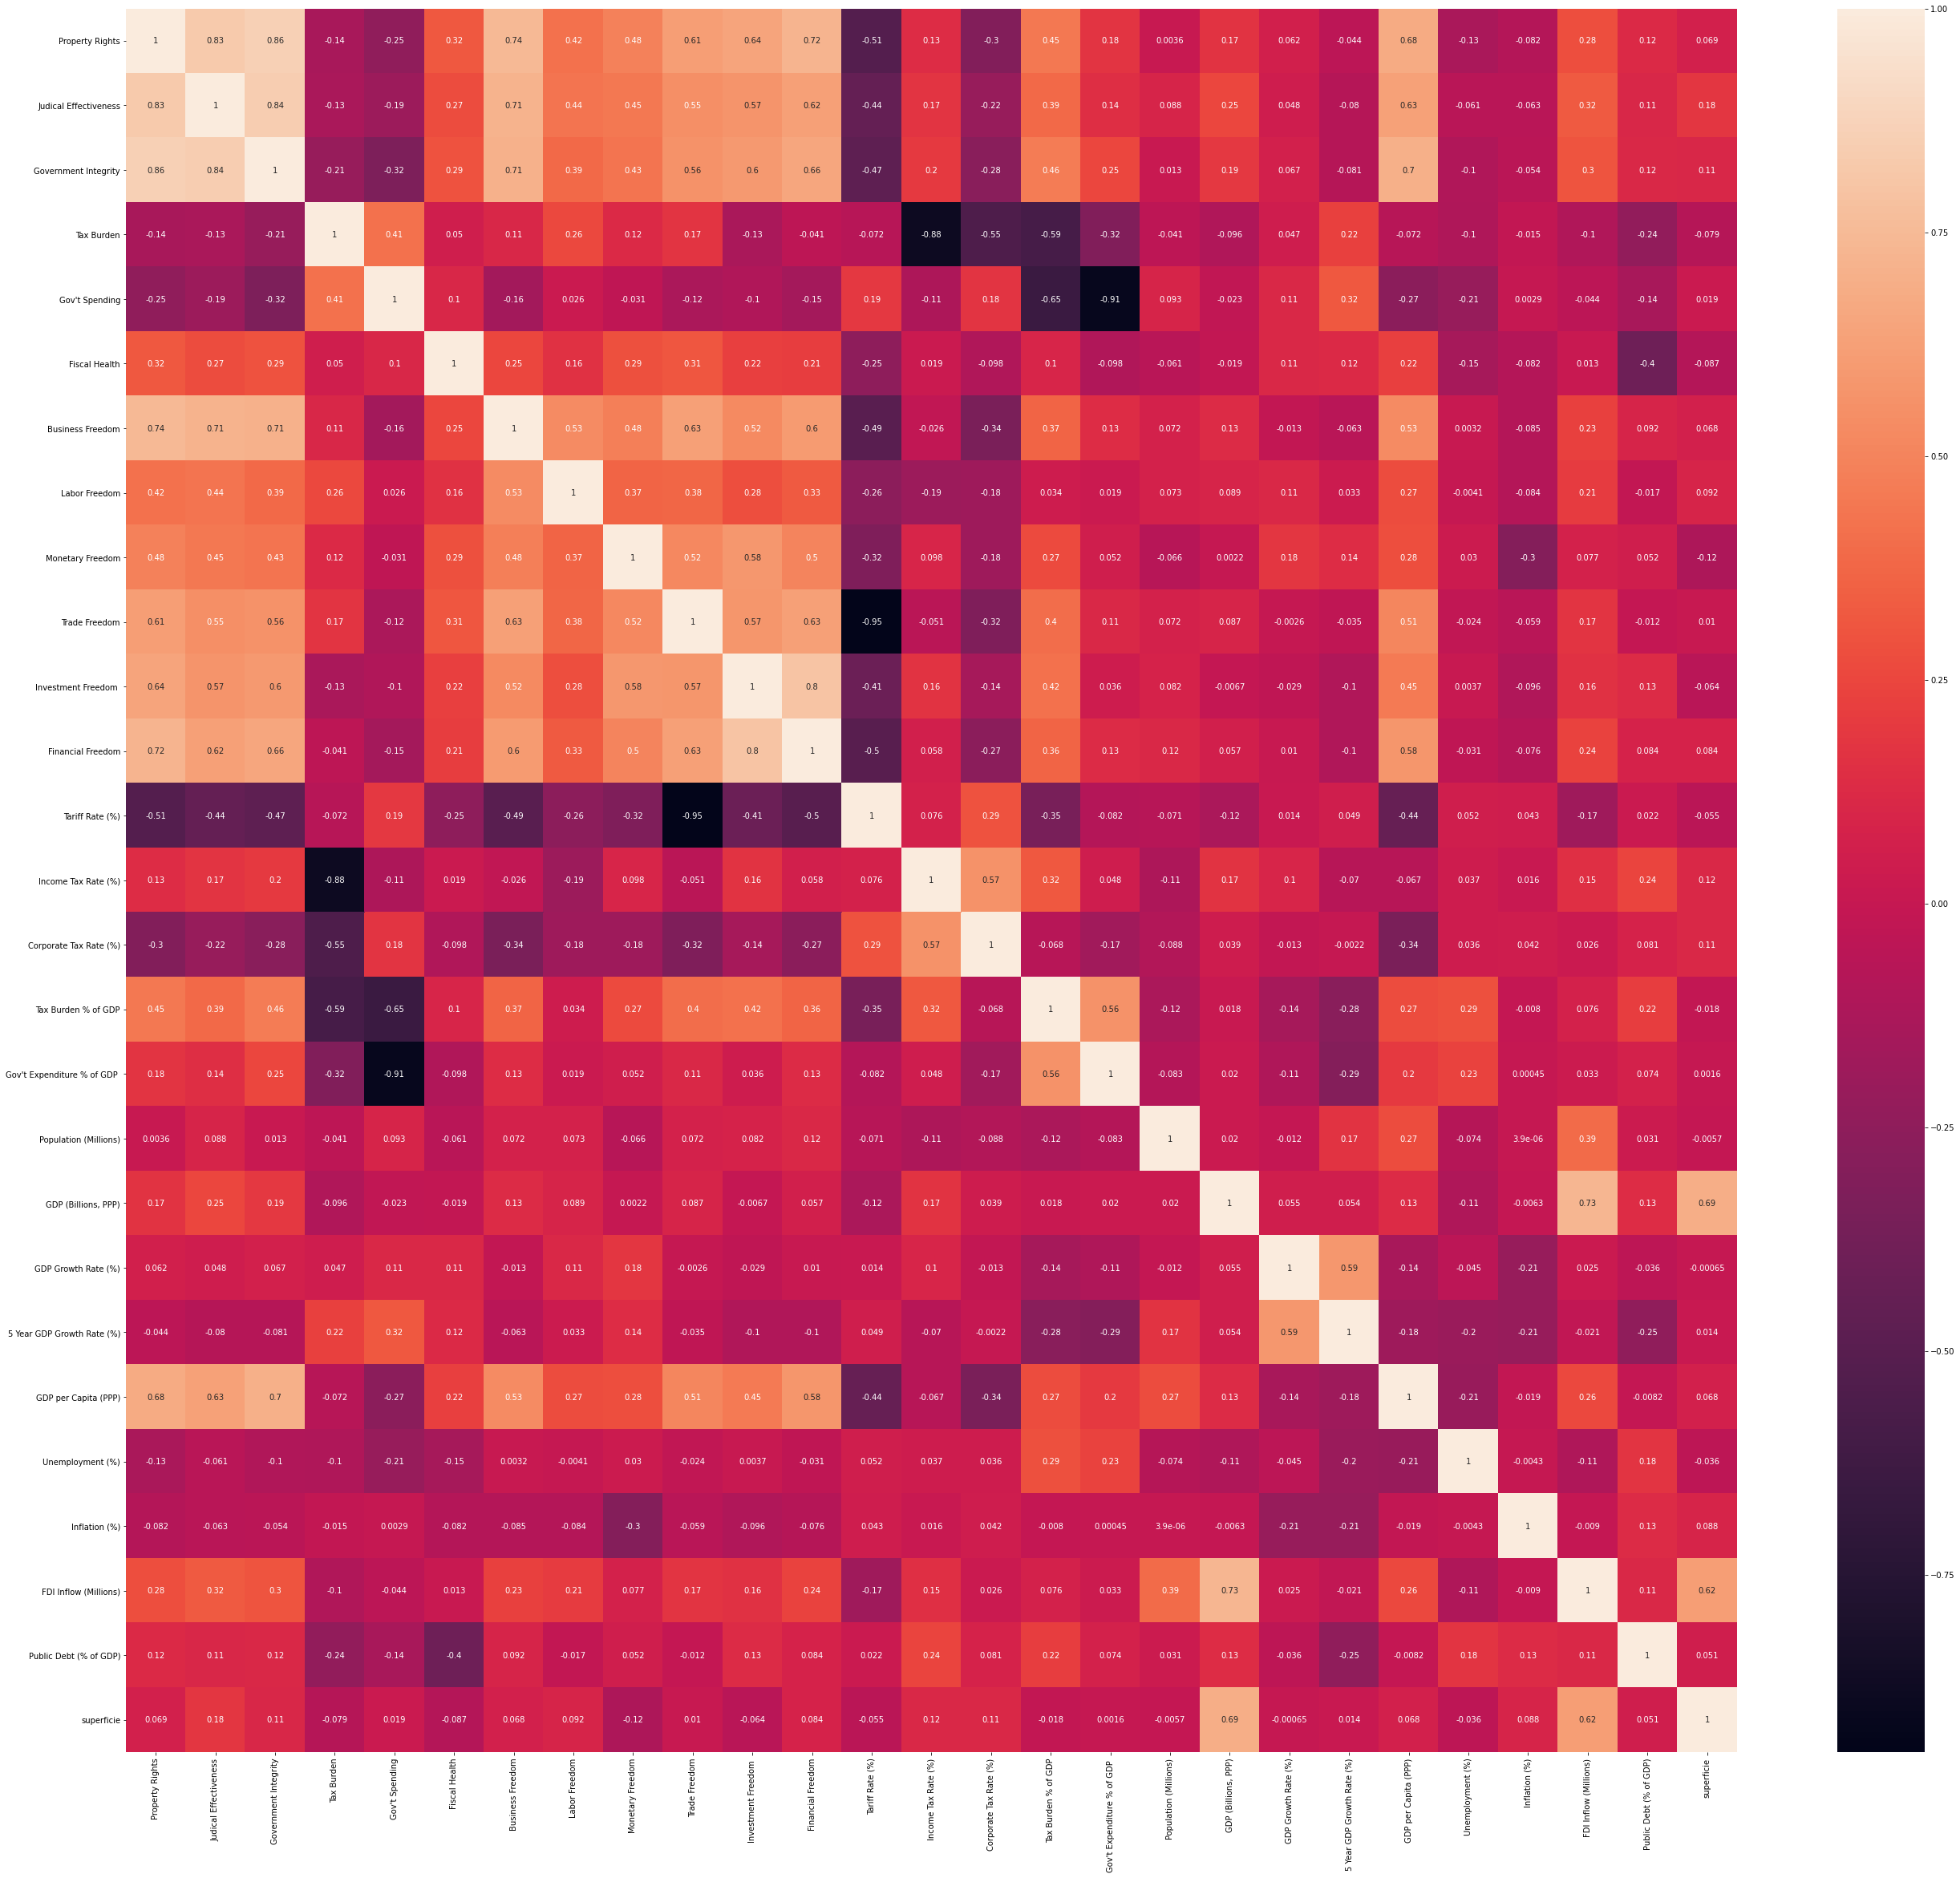

In [ ]:
import seaborn as sns
plt.figure(figsize=(45,40))
sns.heatmap(freedom.corr(), annot=True)
plt.show()

### Spearman

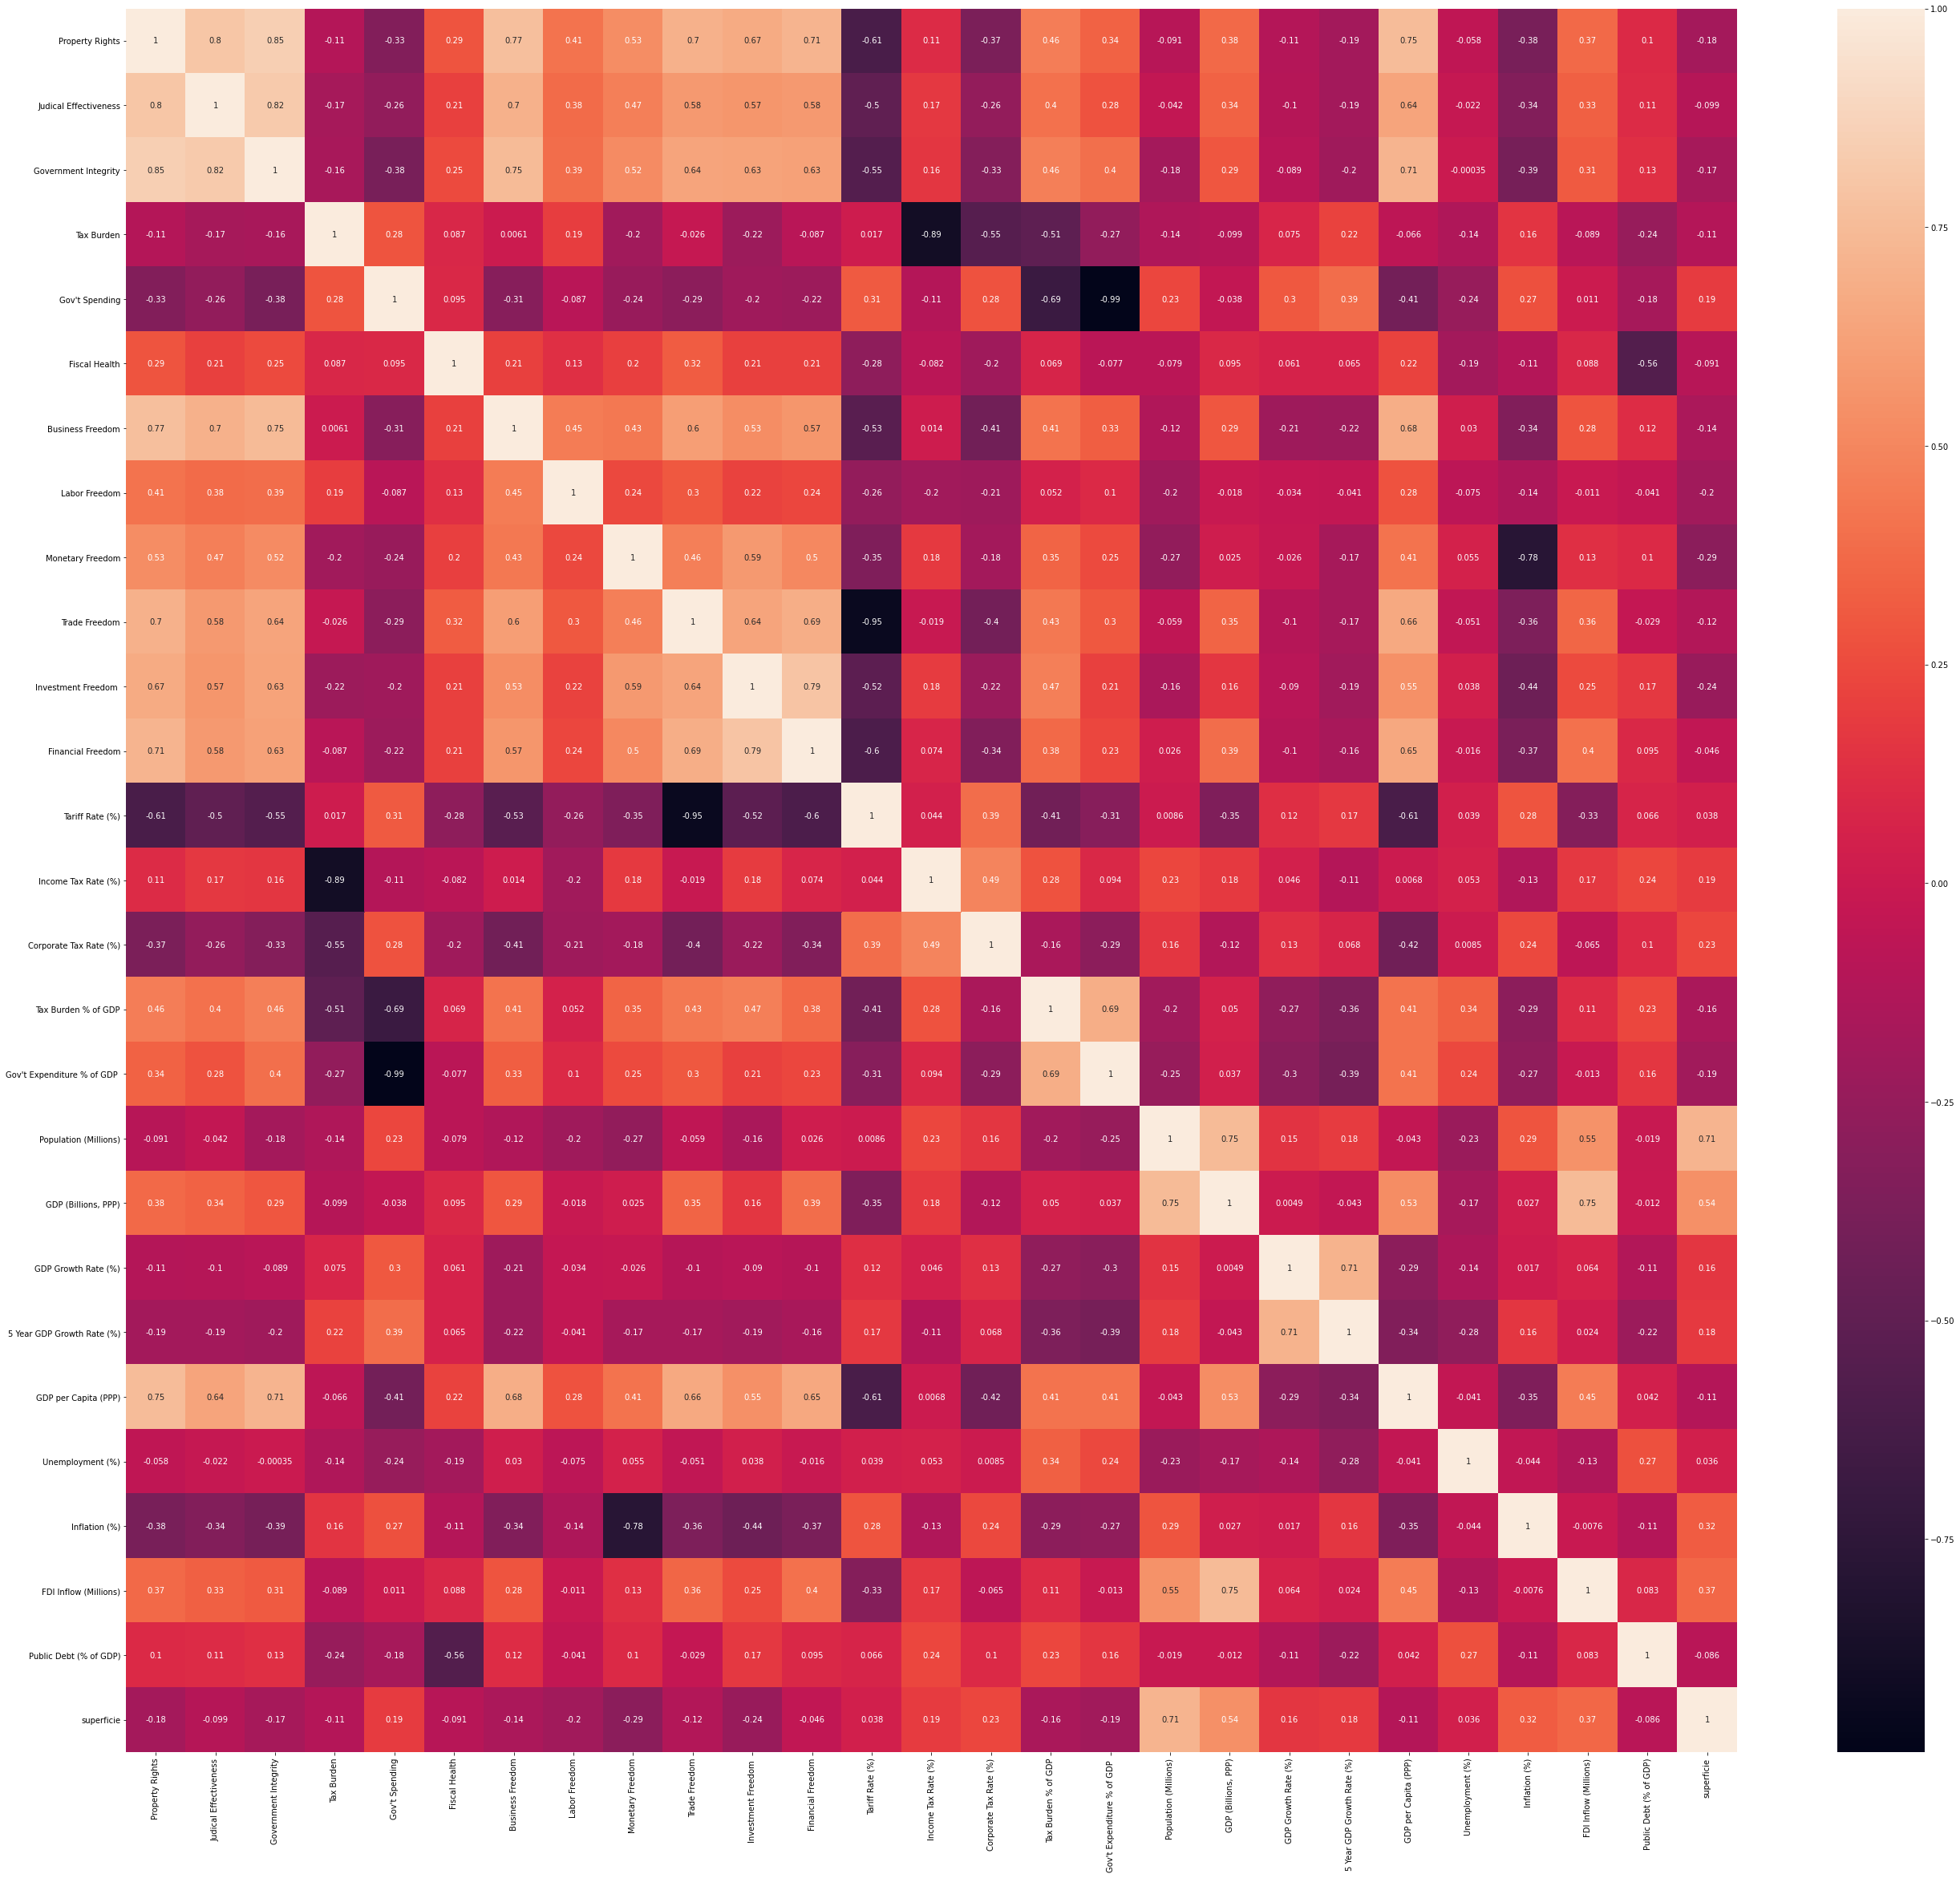

In [ ]:
import seaborn as sns
plt.figure(figsize=(45,40))
sns.heatmap(freedom.corr(method='spearman'), annot=True)
plt.show()

In [ ]:
freedom.dtypes

Country Name                    object
Region                          object
Property Rights                float64
Judical Effectiveness          float64
Government Integrity           float64
Tax Burden                     float64
Gov't Spending                 float64
Fiscal Health                  float64
Business Freedom               float64
Labor Freedom                  float64
Monetary Freedom               float64
Trade Freedom                  float64
Investment Freedom             float64
Financial Freedom              float64
Tariff Rate (%)                float64
Income Tax Rate (%)            float64
Corporate Tax Rate (%)         float64
Tax Burden % of GDP            float64
Gov't Expenditure % of GDP     float64
Population (Millions)          float64
GDP (Billions, PPP)            float64
GDP Growth Rate (%)            float64
5 Year GDP Growth Rate (%)     float64
GDP per Capita (PPP)           float64
Unemployment (%)               float64
Inflation (%)            

In [ ]:
finale = freedom.drop(['Country Name',
                       'Region',
                       'Population (Millions)',
                       'GDP (Billions, PPP)',
                       'GDP Growth Rate (%)',
                       '5 Year GDP Growth Rate (%)'
                       ],axis=1)

In [ ]:
finale.dtypes

Property Rights                float64
Judical Effectiveness          float64
Government Integrity           float64
Tax Burden                     float64
Gov't Spending                 float64
Fiscal Health                  float64
Business Freedom               float64
Labor Freedom                  float64
Monetary Freedom               float64
Trade Freedom                  float64
Investment Freedom             float64
Financial Freedom              float64
Tariff Rate (%)                float64
Income Tax Rate (%)            float64
Corporate Tax Rate (%)         float64
Tax Burden % of GDP            float64
Gov't Expenditure % of GDP     float64
GDP per Capita (PPP)           float64
Unemployment (%)               float64
Inflation (%)                  float64
FDI Inflow (Millions)          float64
Public Debt (% of GDP)         float64
superficie                     float64
dtype: object

In [ ]:
finale.columns = ['Derechos de propiedad',
                  'Efectividad judicial',
                  'Integridad del gobierno',
                  'Carga fiscal',
                  'Gasto del gobierno',
                  'Salud Fiscal',
                  'Libertad comercial',
                  'Libertad Laboral',
                  'Libertad monetaria',
                  'Libertad de comercio',
                  'Libertad de inversión',
                  'Libertad financiera',
                  'Tasa arancelaria (%)',
                  'Tasa de impuesto sobre la renta (%)',
                  'Tasa de impuesto corporativa (%)',
                  'Carga fiscal % del PIB',
                  'Gasto del gobierno % del PIB',
                  'PIB per cápita',
                  'Desempleo (%)',
                  'Inflación (%)',
                  'Entrada de inversión extranjera directa (millones)',
                  'Deuda pública (% del PIB)',
                  'superficie'
                  ]

In [ ]:
finale.dtypes

Derechos de propiedad                                 float64
Efectividad judicial                                  float64
Integridad del gobierno                               float64
Carga fiscal                                          float64
Gasto del gobierno                                    float64
Salud Fiscal                                          float64
Libertad comercial                                    float64
Libertad Laboral                                      float64
Libertad monetaria                                    float64
Libertad de comercio                                  float64
Libertad de inversión                                 float64
Libertad financiera                                   float64
Tasa arancelaria (%)                                  float64
Tasa de impuesto sobre la renta (%)                   float64
Tasa de impuesto corporativa (%)                      float64
Carga fiscal % del PIB                                float64
Gasto de

In [ ]:
finale.dropna(axis=0, inplace=True)

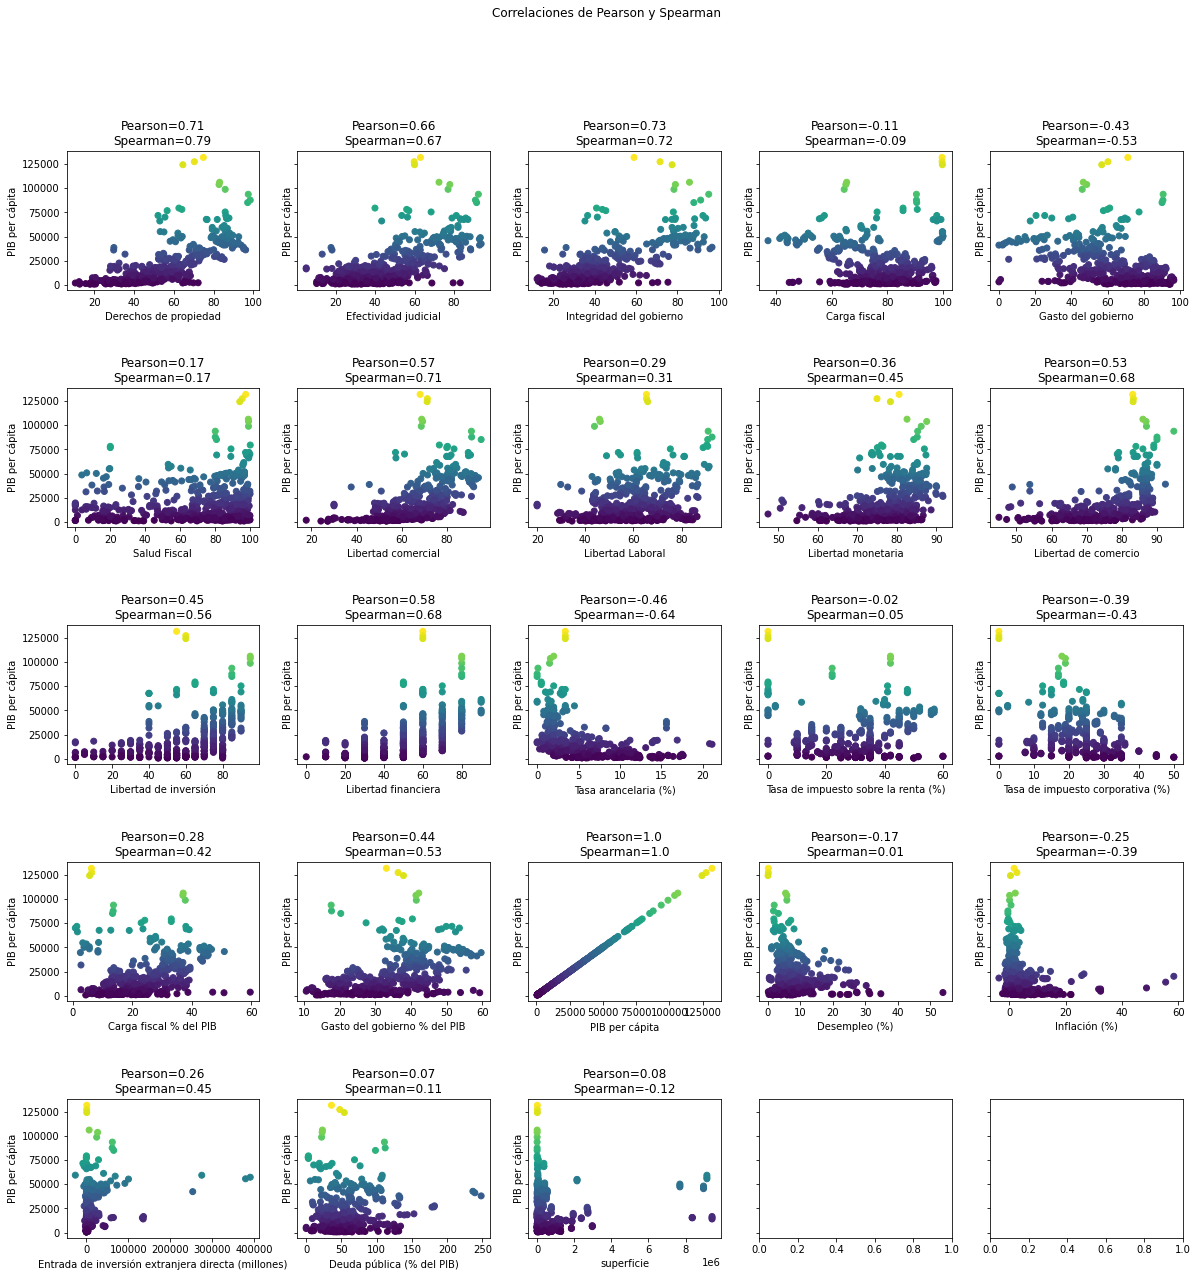

In [ ]:
fig, axs = plt.subplots(5,5,sharex=False,sharey=True,figsize=(20,20))
fig.suptitle('Correlaciones de Pearson y Spearman')
k=0
for i in range(5):
  for j in range(5):
    k=k+1
    if k==24:
      break
    else: 
      pass
    factor = finale.iloc[:,k-1].name
    pearson = round(pearsonr(finale[factor],finale['PIB per cápita'])[0],2)
    spearman = round(spearmanr(finale[factor],finale['PIB per cápita'])[0],2)
    axs[i,j].scatter(data=finale,x=factor,y='PIB per cápita',c='PIB per cápita')
    axs[i,j].title.set_text('Pearson='+str(pearson)+'\nSpearman='+str(spearman))
    axs[i,j].set_xlabel(factor)
    axs[i,j].set_ylabel('PIB per cápita')
  
plt.subplots_adjust(hspace=0.7)
plt.show()

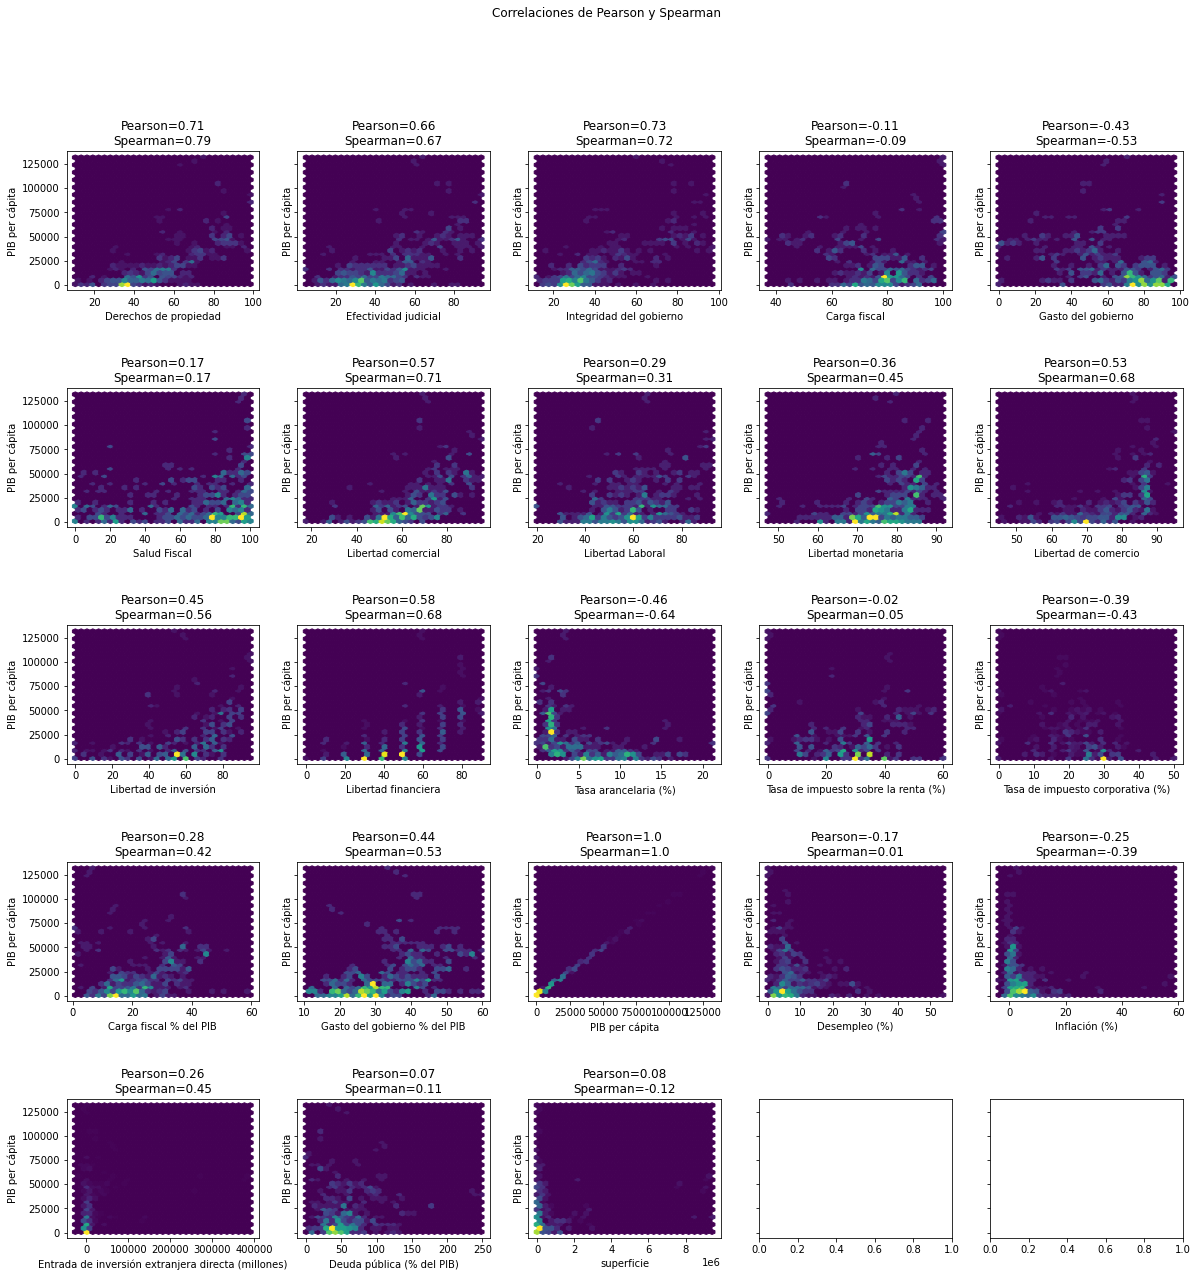

In [ ]:
fig, axs = plt.subplots(5,5,sharex=False,sharey=True,figsize=(20,20))
fig.suptitle('Correlaciones de Pearson y Spearman')
k=0
for i in range(5):
  for j in range(5):
    k=k+1
    if k==24:
      break
    else: 
      pass
    factor = finale.iloc[:,k-1].name
    pearson = round(pearsonr(finale[factor],finale['PIB per cápita'])[0],2)
    spearman = round(spearmanr(finale[factor],finale['PIB per cápita'])[0],2)
    axs[i,j].hexbin(data=finale,x=factor,y='PIB per cápita', gridsize=30)
    axs[i,j].title.set_text('Pearson='+str(pearson)+'\nSpearman='+str(spearman))
    axs[i,j].set_xlabel(factor)
    axs[i,j].set_ylabel('PIB per cápita')
  
plt.subplots_adjust(hspace=0.7)
plt.show()

In [ ]:
finale.columns

Index(['Derechos de propiedad', 'Efectividad judicial',
       'Integridad del gobierno', 'Carga fiscal', 'Gasto del gobierno',
       'Salud Fiscal', 'Libertad comercial', 'Libertad Laboral',
       'Libertad monetaria', 'Libertad de comercio', 'Libertad de inversión',
       'Libertad financiera', 'Tasa arancelaria (%)',
       'Tasa de impuesto sobre la renta (%)',
       'Tasa de impuesto corporativa (%)', 'Carga fiscal % del PIB',
       'Gasto del gobierno % del PIB', 'PIB per cápita', 'Desempleo (%)',
       'Inflación (%)', 'Entrada de inversión extranjera directa (millones)',
       'Deuda pública (% del PIB)', 'superficie'],
      dtype='object')

In [ ]:
model = RandomForestRegressor(criterion='mae',
                              max_depth=10,
                              max_features='sqrt',
                              n_estimators=200,
                              n_jobs=-1,
                              random_state=0)
model.fit(finale.drop('PIB per cápita',axis=1), finale['PIB per cápita'])

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mae',
                      max_depth=10, max_features='sqrt', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=200, n_jobs=-1, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [ ]:
feature_importances = pd.DataFrame()
feature_importances['Factores'] = list(finale.drop('PIB per cápita',axis=1).columns)
feature_importances['Importancia'] = model.feature_importances_
feature_importances.sort_values('Importancia', ascending=True, inplace=True)
feature_importances.reset_index(drop=True, inplace=True)

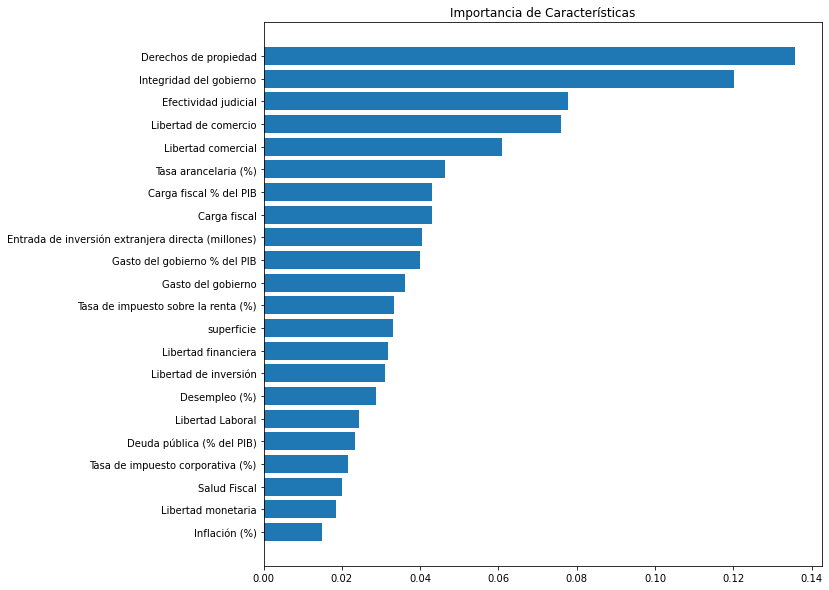

In [ ]:
plt.figure(figsize=(10,10))
plt.barh(feature_importances['Factores'], feature_importances['Importancia'], )
plt.title('Importancia de Características')
plt.show()

In [ ]:
eliminar = [
            #'Derechos de propiedad',
            #'Integridad del gobierno',
            #'Efectividad judicial',
            #'Libertad de comercio',
            #'Libertad comercial',
            #'Tasa arancelaria (%)',
            #'Carga fiscal % del PIB',
            #'Carga fiscal',
            #'Entrada de inversión extranjera directa (millones)',
            'Gasto del gobierno % del PIB',
            'Gasto del gobierno',
            #'Tasa de impuesto sobre la renta (%)',
            'superficie',
            #'Libertad financiera',
            #'Libertad de inversión',
            'Desempleo (%)',
            'Libertad Laboral',
            'Deuda pública (% del PIB)',
            'Tasa de impuesto corporativa (%)',
            'Salud Fiscal',
            'Libertad monetaria',
            'Inflación (%)',
            'PIB per cápita'
            ]

In [ ]:
X = finale.drop(eliminar, axis=1)
y = finale['PIB per cápita']

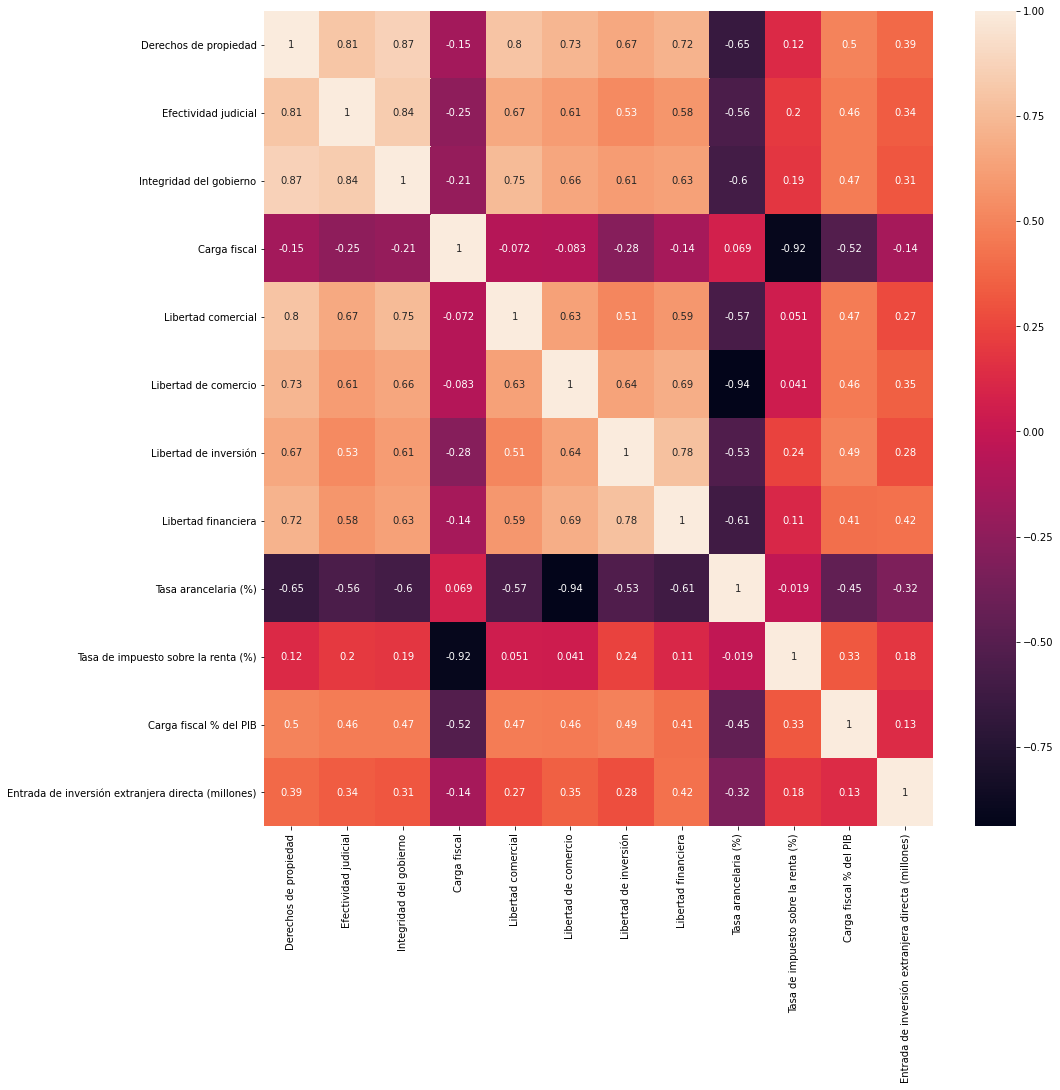

In [ ]:
plt.figure(figsize=(15,15))
sns.heatmap(X.corr(method='spearman'), annot=True)
plt.show()

In [ ]:
X.head()

,Derechos de propiedad,Efectividad judicial,Integridad del gobierno,Carga fiscal,Libertad comercial,Libertad de comercio,Libertad de inversión,Libertad financiera,Tasa arancelaria (%),Tasa de impuesto sobre la renta (%),Carga fiscal % del PIB,Entrada de inversión extranjera directa (millones)
0,12.6,28.4,27.5,91.6,54.2,66.0,0.0,0.0,7.0,20.0,6.5,58.0
1,54.0,28.5,39.7,86.9,79.3,87.7,70.0,70.0,1.1,23.0,23.6,1003.3
2,38.2,29.6,31.7,81.1,62.1,63.3,35.0,30.0,8.4,35.0,11.7,-587.3
3,36.4,19.8,12.8,87.7,58.5,56.7,30.0,40.0,11.7,17.0,6.5,8680.9
4,32.4,39.6,38.2,62.6,57.3,66.7,50.0,50.0,6.6,35.0,35.9,11654.9


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [ ]:
model = RandomForestRegressor(criterion='mae',
                                    max_depth=10,
                                    max_features='sqrt',
                                    n_estimators=200,
                                    n_jobs=-1)

In [ ]:
model.fit(X_train,y_train )

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mae',
                      max_depth=10, max_features='sqrt', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=200, n_jobs=-1, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
feature_importances = pd.DataFrame()
feature_importances['Factores'] = list(X.columns)
feature_importances['Importancia'] = model.feature_importances_
feature_importances.sort_values('Importancia', ascending=True, inplace=True)
feature_importances.reset_index(drop=True, inplace=True)

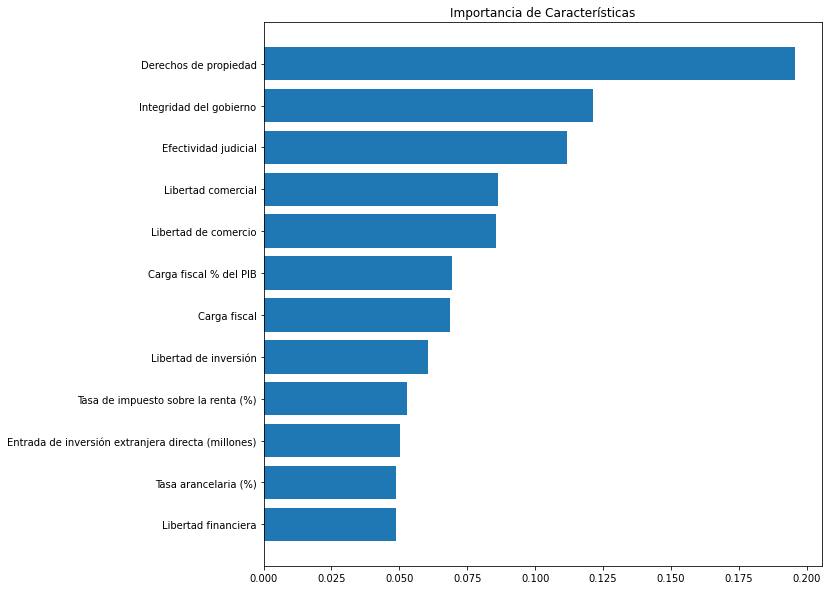

In [ ]:
plt.figure(figsize=(10,10))
plt.barh(feature_importances['Factores'], feature_importances['Importancia'], )
plt.title('Importancia de Características')
plt.show()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
fig = px.scatter(x=y_pred, y=y_test, height=700, width=700, 
                 range_x=[0,65000], range_y=[0,65000], 
                 labels={'x':'Predicción','y':'Realidad'},
                 title="Resultados sobre la predicción de la economía de los países")
fig.show()

In [ ]:
print(pearsonr(y_test,y_pred))
print(np.corrcoef(y_test,y_pred))

(0.9088783275328426, 1.668789426331086e-53)
[[1.         0.90887833]
 [0.90887833 1.        ]]


In [ ]:
print('RMSE:',sqrt(mean_squared_error(y_test,y_pred)))
print('MAE:',mean_absolute_error(y_test,y_pred))
print('MAD:',median_absolute_error(y_test,y_pred))

RMSE: 10433.868931569683
MAE: 5690.680985507247
MAD: 2809.241375000002


In [ ]:
finale2 = freedom.drop(['Region',
                        'Population (Millions)',
                        'GDP (Billions, PPP)',
                        'GDP Growth Rate (%)',
                        '5 Year GDP Growth Rate (%)'
                        ],axis=1)
finale2.dropna(axis=0,inplace=True)

In [ ]:
"""
Property Rights                 Derechos de propiedad
Judical Effectiveness           Efectividad judicial
Government Integrity            Integridad del gobierno
Tax Burden                      Carga fiscal
Gov't Spending                  Gasto del gobierno
Fiscal Health                   Salud Fiscal
Business Freedom                Libertad comercial
Labor Freedom                   Libertad Laboral
Monetary Freedom                Libertad monetaria
Trade Freedom                   Libertad de comercio
Investment Freedom              Libertad de inversión
Financial Freedom               Libertad financiera
Tariff Rate (%)                 Tasa arancelaria (%)
Income Tax Rate (%)             Tasa de impuesto sobre la renta (%)
Corporate Tax Rate (%)          Tasa de impuesto corporativa (%)
Tax Burden % of GDP             Carga fiscal % del PIB
Gov't Expenditure % of GDP      Gasto del gobierno % del PIB
GDP per Capita (PPP)            PIB per cápita
Unemployment (%)                Desempleo (%)
Inflation (%)                   Inflación (%)
FDI Inflow (Millions)           Entrada de inversión extranjera directa (millones)
Public Debt (% of GDP)          Deuda pública (% del PIB)
superficie                      superficie
"""

"\nProperty Rights                 Derechos de propiedad\nJudical Effectiveness           Efectividad judicial\nGovernment Integrity            Integridad del gobierno\nTax Burden                      Carga fiscal\nGov't Spending                  Gasto del gobierno\nFiscal Health                   Salud Fiscal\nBusiness Freedom                Libertad comercial\nLabor Freedom                   Libertad Laboral\nMonetary Freedom                Libertad monetaria\nTrade Freedom                   Libertad de comercio\nInvestment Freedom              Libertad de inversión\nFinancial Freedom               Libertad financiera\nTariff Rate (%)                 Tasa arancelaria (%)\nIncome Tax Rate (%)             Tasa de impuesto sobre la renta (%)\nCorporate Tax Rate (%)          Tasa de impuesto corporativa (%)\nTax Burden % of GDP             Carga fiscal % del PIB\nGov't Expenditure % of GDP      Gasto del gobierno % del PIB\nGDP per Capita (PPP)            PIB per cápita\nUnemployment (%)

In [ ]:
eliminar

['Gasto del gobierno % del PIB',
 'Gasto del gobierno',
 'superficie',
 'Desempleo (%)',
 'Libertad Laboral',
 'Deuda pública (% del PIB)',
 'Tasa de impuesto corporativa (%)',
 'Salud Fiscal',
 'Libertad monetaria',
 'Inflación (%)',
 'PIB per cápita']

In [ ]:
finale2['Predicción'] = model.predict(finale2.drop(['GDP per Capita (PPP)',
                                                    'Gov\'t Expenditure % of GDP ',
                                                    'Gov\'t Spending',
                                                    'superficie',
                                                    'Unemployment (%)',
                                                    'Labor Freedom',
                                                    'Public Debt (% of GDP)',
                                                    'Corporate Tax Rate (%)',
                                                    'Fiscal Health',
                                                    'Monetary Freedom',
                                                    'Inflation (%)',
                                                    'Country Name'],axis=1))

In [ ]:
finale2.head()

,Country Name,Property Rights,Judical Effectiveness,Government Integrity,Tax Burden,Gov't Spending,Fiscal Health,Business Freedom,Labor Freedom,Monetary Freedom,Trade Freedom,Investment Freedom,Financial Freedom,Tariff Rate (%),Income Tax Rate (%),Corporate Tax Rate (%),Tax Burden % of GDP,Gov't Expenditure % of GDP,GDP per Capita (PPP),Unemployment (%),Inflation (%),FDI Inflow (Millions),Public Debt (% of GDP),superficie,Predicción
0,Afghanistan,12.6,28.4,27.5,91.6,79.9,97.3,54.2,59.9,69.3,66.0,0.0,0.0,7.0,20.0,20.0,6.5,27.1,1947.0,9.6,-1.5,58.0,6.8,652860.0,2123.17250
1,Albania,54.0,28.5,39.7,86.9,72.5,51.5,79.3,50.7,81.4,87.7,70.0,70.0,1.1,23.0,15.0,23.6,30.0,11301.0,17.3,1.9,1003.3,71.9,27400.0,12615.19025
2,Algeria,38.2,29.6,31.7,81.1,51.0,19.8,62.1,49.5,67.0,63.3,35.0,30.0,8.4,35.0,23.0,11.7,44.4,14504.0,10.5,4.8,-587.3,8.7,2381741.0,9881.20875
3,Angola,36.4,19.8,12.8,87.7,58.6,70.7,58.5,40.4,70.6,56.7,30.0,40.0,11.7,17.0,30.0,6.5,28.9,7344.0,7.6,10.3,8680.9,62.3,1246700.0,7559.27975
4,Argentina,32.4,39.6,38.2,62.6,54.6,56.4,57.3,46.1,50.9,66.7,50.0,50.0,6.6,35.0,35.0,35.9,43.9,22554.0,6.7,26.5,11654.9,56.5,2736690.0,16025.39725


In [ ]:
fig = px.scatter(finale2, x='Predicción', y='GDP per Capita (PPP)', height=700, width=1200, 
                 #range_x=[0,65000], range_y=[0,65000],
                 color='Country Name',
                 labels={'x':'Predicción','y':'Realidad'},
                 title="Resultados sobre la predicción de la economía de los países")
fig.show()

# ¿Cómo está Perú?

In [ ]:
Peru = freedom.drop(['Region',
                     'Population (Millions)',
                     'GDP (Billions, PPP)',
                     'GDP Growth Rate (%)',
                     '5 Year GDP Growth Rate (%)'
                     ],axis=1)
Peru.dropna(axis=0,inplace=True)
Peru.columns

Index(['Country Name', 'Property Rights', 'Judical Effectiveness',
       'Government Integrity', 'Tax Burden', 'Gov't Spending', 'Fiscal Health',
       'Business Freedom', 'Labor Freedom', 'Monetary Freedom',
       'Trade Freedom', 'Investment Freedom ', 'Financial Freedom',
       'Tariff Rate (%)', 'Income Tax Rate (%)', 'Corporate Tax Rate (%)',
       'Tax Burden % of GDP', 'Gov't Expenditure % of GDP ',
       'GDP per Capita (PPP)', 'Unemployment (%)', 'Inflation (%)',
       'FDI Inflow (Millions)', 'Public Debt (% of GDP)', 'superficie'],
      dtype='object')

In [ ]:
Peru.columns = [
                'País',
                'Derechos de propiedad',
                'Efectividad judicial',
                'Integridad del gobierno',
                'Carga fiscal',
                'Gasto del gobierno',
                'Salud Fiscal',
                'Libertad comercial',
                'Libertad Laboral',
                'Libertad monetaria',
                'Libertad de comercio',
                'Libertad de inversión',
                'Libertad financiera',
                'Tasa arancelaria (%)',
                'Tasa de impuesto sobre la renta (%)',
                'Tasa de impuesto corporativa (%)',
                'Carga fiscal % del PIB',
                'Gasto del gobierno % del PIB',
                'PIB per cápita',
                'Desempleo (%)',
                'Inflación (%)',
                'Entrada de inversión extranjera directa (millones)',
                'Deuda pública (% del PIB)',
                'superficie'
                ]
eliminar.remove('PIB per cápita')
Peru.drop(eliminar,axis=1,inplace=True)
Peru = Peru[Peru['País']=='Peru']

In [ ]:
Peru = Peru.drop([129,329],axis=0)
Peru

,País,Derechos de propiedad,Efectividad judicial,Integridad del gobierno,Carga fiscal,Libertad comercial,Libertad de comercio,Libertad de inversión,Libertad financiera,Tasa arancelaria (%),Tasa de impuesto sobre la renta (%),Carga fiscal % del PIB,PIB per cápita,Entrada de inversión extranjera directa (millones)
518,Peru,56.1,34.0,31.8,80.6,67.8,86.4,75.0,60.0,1.8,30.0,16.0,13334.0,6769.5


In [ ]:
Peru = Peru.append({
    'País':'Peru',
    'Derechos de propiedad':80,
    'Efectividad judicial':34,
    'Integridad del gobierno':31.8,
    'Carga fiscal':80.6,
    'Libertad comercial':67.8,
    'Libertad de comercio':86.4,
    'Libertad de inversión':75,
    'Libertad financiera':60,
    'Tasa arancelaria (%)':1.8,
    'Tasa de impuesto sobre la renta (%)':30,
    'Carga fiscal % del PIB':16,
    'PIB per cápita':0,
    'Entrada de inversión extranjera directa (millones)':6769.5,
},ignore_index=True)

In [ ]:
predecir = Peru.drop(['País','PIB per cápita'],axis=1).iloc[1,:].values
pib = model.predict(predecir.reshape(1,-1))
Peru.iloc[1,12] = pib

In [ ]:
Peru

,País,Derechos de propiedad,Efectividad judicial,Integridad del gobierno,Carga fiscal,Libertad comercial,Libertad de comercio,Libertad de inversión,Libertad financiera,Tasa arancelaria (%),Tasa de impuesto sobre la renta (%),Carga fiscal % del PIB,PIB per cápita,Entrada de inversión extranjera directa (millones)
0,Peru,56.1,34.0,31.8,80.6,67.8,86.4,75.0,60.0,1.8,30.0,16.0,13334.00,6769.5
1,Peru,80.0,34.0,31.8,80.6,67.8,86.4,75.0,60.0,1.8,30.0,16.0,31160.07,6769.5


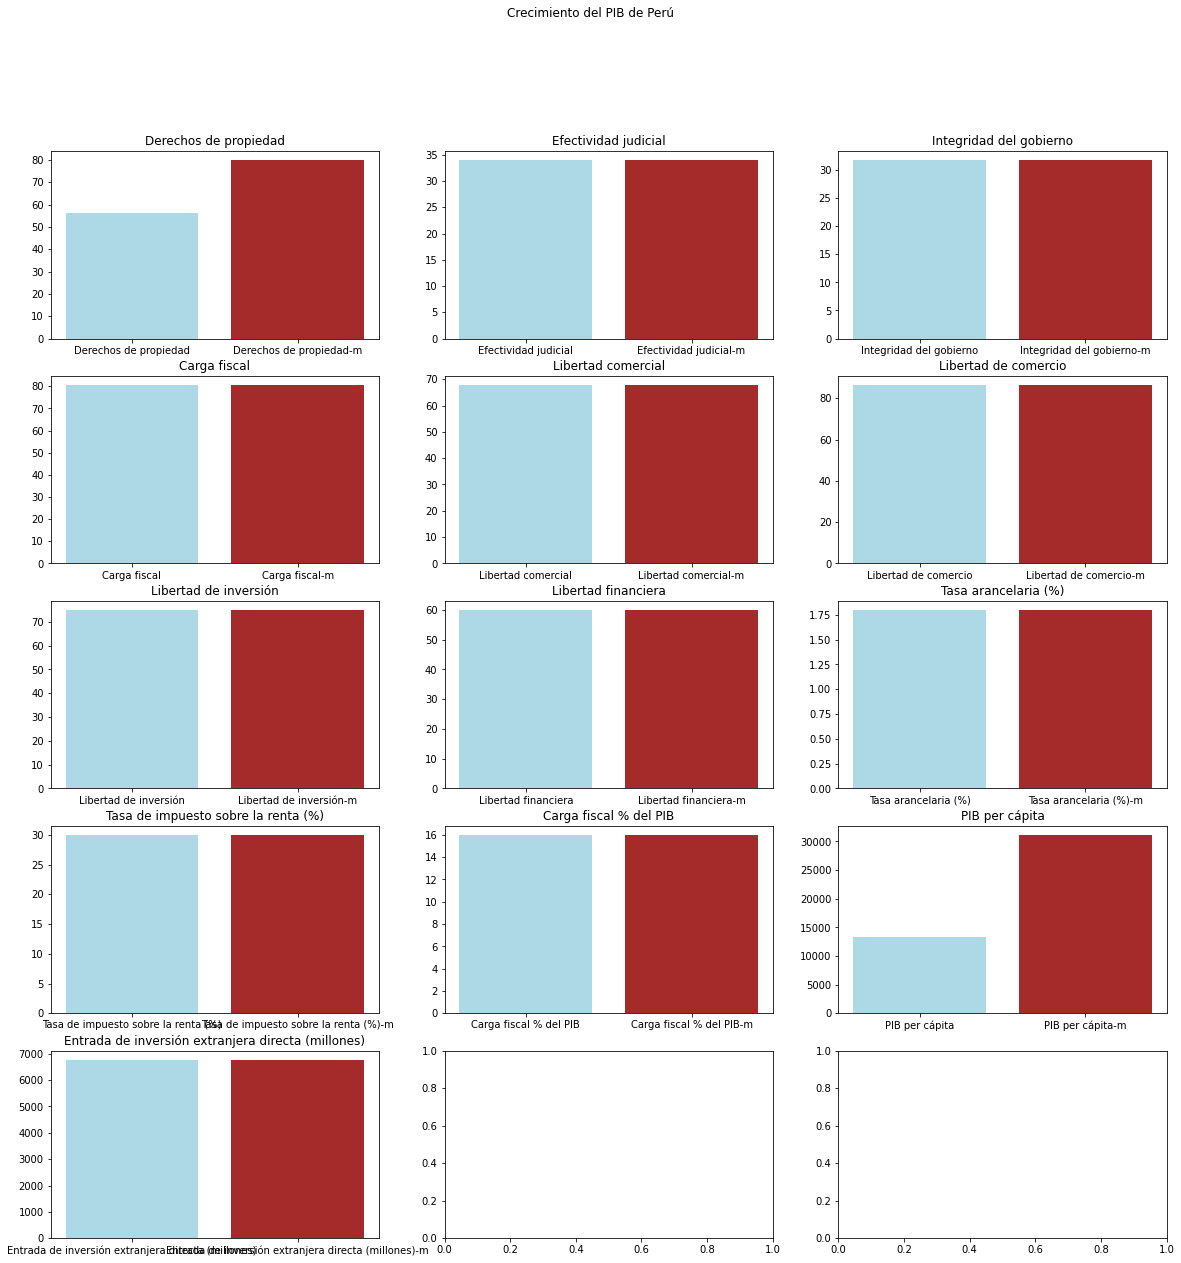

In [ ]:
paises = list(Peru.columns)
paises.remove('País')

fig, axs = plt.subplots(5,3,sharex=False,sharey=False,figsize=(20,20))
fig.suptitle('Crecimiento del PIB de Perú')
k=0

for i in range(5):
  for j in range(3):
    k=k+1
    if k==14:
      break
    else: 
      pass
    factor = Peru.iloc[:,k].name
    
    valor1 = list(Peru.drop('País',axis=1).values[0])[k-1]
    valor2 = list(Peru.drop('País',axis=1).values[1])[k-1]

    axs[i,j].bar([factor,factor+'-m'],
                 height=[valor1,valor2],
                 color=['lightblue','brown'])
    axs[i,j].title.set_text(factor)

plt.show()

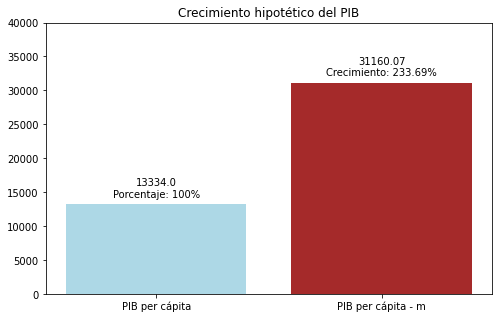

In [ ]:
valor1 = list(Peru.drop('País',axis=1).values[0])[11]
valor2 = list(Peru.drop('País',axis=1).values[1])[11]

plt.figure(figsize=(8,5))
plt.bar(['PIB per cápita','PIB per cápita - m'],
        height=[valor1,valor2],
        color=['lightblue','brown'])
plt.title('Crecimiento hipotético del PIB')
plt.ylim(0,40000)
plt.text(0,valor1+1000,str(valor1)+'\nPorcentaje: 100%',
         horizontalalignment='center')
plt.text(1,valor2+1000,str(round(valor2,2))+'\nCrecimiento: '+str(round(valor2*100/valor1,2))+'%',
         horizontalalignment='center')
plt.show()